In [ ]:
!git clone https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git

Cloning into 'Pandas-Data-Science-Tasks'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.


#Sales Analysis

### import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

###merging 12 months dataset

In [ ]:
files = [file for file in os.listdir("/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data")]

all_month_df = pd.DataFrame()

for file in files:
  df = pd.read_csv("/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/"+ file)
  all_month_df = pd.concat([all_month_df , df] , ignore_index= True)

all_month_df.to_csv('all_month_data.csv' , index = False)

In [ ]:
all_data = pd.read_csv('/content/all_month_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [ ]:
all_data.shape

(186850, 6)

#Clean DATA

In [ ]:
all_data.head(50);

In [ ]:
# nan_df = all_data[all_data.isna().any(axis = 1)]
all_data = all_data.dropna(how= 'all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [ ]:
##find error in data 'Or'

all_data = all_data [all_data['Month'] != 'Or']

all_data.shape

(185950, 7)

In [ ]:
#disable warning
pd.options.mode.chained_assignment = None 

In [ ]:


## convert type of Data

all_data['Quantity Ordered'] = pd.to_numeric( all_data['Quantity Ordered'])

all_data['Price Each'] = pd.to_numeric( all_data['Price Each'])

##Augment Data with adding column


##Task 2 : adding month column

In [ ]:
all_data['Month'] = all_data["Order Date"].str[0:2] 

all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


In [ ]:
set(all_data['Month'][:])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

###task 3 :add sales column

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95
5,248156,34in Ultrawide Monitor,1,379.99,09/13/19 14:59,"469 12th St, Los Angeles, CA 90001",9,379.99
6,248157,Lightning Charging Cable,1,14.95,09/07/19 09:59,"773 Johnson St, Portland, ME 04101",9,14.95
7,248158,Lightning Charging Cable,1,14.95,09/02/19 14:16,"682 Sunset St, Los Angeles, CA 90001",9,14.95
8,248159,Vareebadd Phone,1,400.00,09/06/19 16:45,"664 Wilson St, New York City, NY 10001",9,400.00
9,248160,Wired Headphones,1,11.99,09/01/19 22:03,"446 9th St, San Francisco, CA 94016",9,11.99


####Question 1 : what was the best month for sale? how much was earned that month?


In [ ]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


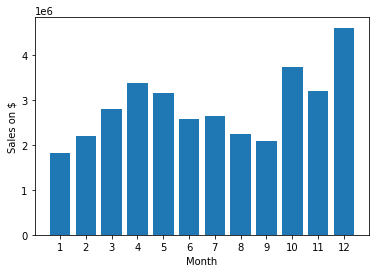

In [ ]:
## visualize

result = all_data.groupby('Month').sum()

months = range(1,13)

plt.bar(months , result['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales on $')
plt.show()

###Question2 : What city had the highest number of sales?


In [ ]:
##use .apply
def get_state(address):
  return address.split(',')[2].split(' ')[1]

def get_city(address):
  return address.split(',')[1]


all_data ['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA)


In [ ]:





results = all_data.groupby('City').sum()

results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


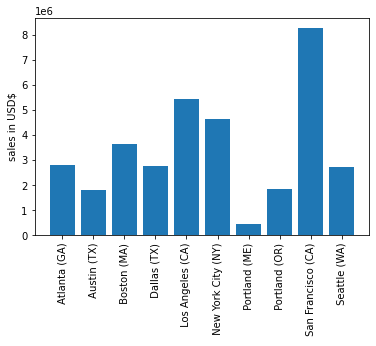

In [ ]:
## we should know that here it should be the same order in cities name ann slaes!!
cities = [city for city , df in all_data.groupby('City')]



plt.bar(cities , height = results['Sales'] , data = results)
plt.xticks(cities , rotation = 'vertical')
plt.ylabel('sales in USD$')
plt.show()


###Question 3: what time should we display advertisments to maximize likelihood of costumer's buying product?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA)


In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA),14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX),10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA),17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA),7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA),19


Text(0.5, 0, 'Hour')

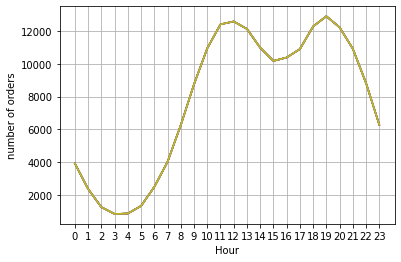

In [ ]:
hour = [hour for hour ,df in all_data.groupby('Hour')]

sales = all_data.groupby('Hour').count()

plt.plot(hour , sales)
plt.xticks(hour)
plt.grid()
plt.ylabel('number of orders')
plt.xlabel('Hour')


##as we can see detail on this plot, the advertisments should display in 11 Am and 7 pm.

###question4 : what products are most often sold together?

In [ ]:
all_data.head()
all_data.shape

(185950, 10)

In [ ]:
all_data['Order ID'].unique().size

178437

In [ ]:
df = all_data[all_data['Order ID'].duplicated (keep = False)]

df['Grouped'] =  df.groupby('Order ID')['Product'].transform (lambda x : ','.join(x))

df = df[['Order ID' , 'Grouped']].drop_duplicates()


df.head()

,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


In [ ]:
##not understood this part


from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count .update(Counter(combinations(row_list , 2)))##if change 2 to 3 you will see list with 3 item in every list.

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

###What product sold the most?why do you think it sold the most?

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA),14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX),10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA),17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA),7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA),19


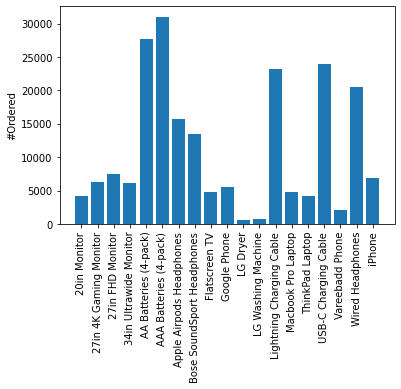

In [ ]:
product_group= all_data.groupby('Product')
Quantity = product_group.sum()['Quantity Ordered']
products = [product for product ,df in product_group]


plt.bar(products , Quantity)
plt.xticks(rotation = 'vertical')
plt.ylabel('#Ordered')
plt.show()


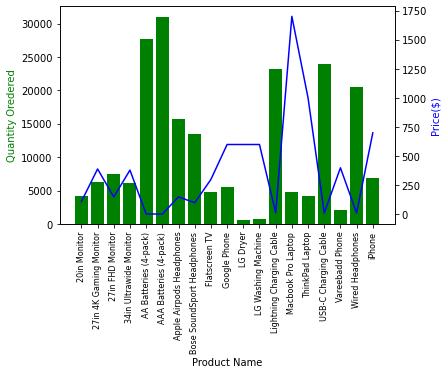

In [ ]:
##to find out whay Batteries sold the most?we think it's bcs of cheap price.


prices = all_data.groupby('Product').mean()['Price Each']


fig , ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.bar(products , Quantity , color ='g')
ax2.plot(products, prices , 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Oredered' , color = 'g')
ax2.set_ylabel('Price($)', color = 'b')
ax1.set_xticklabels(products ,rotation = 'vertical' , size = 8 )

plt.show()